## Central Limit Theorem


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, skewnorm

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


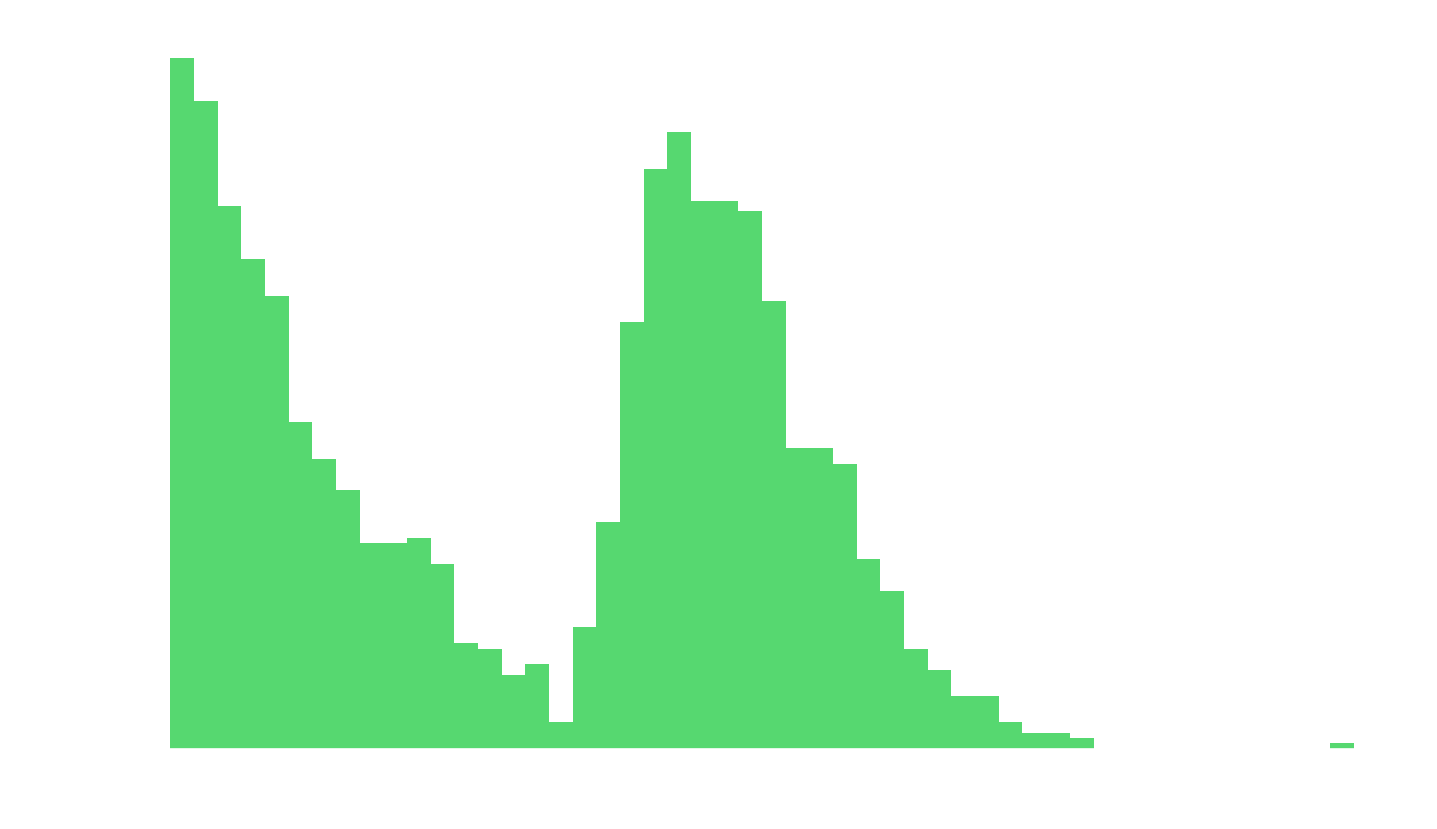

In [2]:
def get_data(n):
    data = np.concatenate((expon.rvs(scale=1, size=n//2), skewnorm.rvs(5, loc=3, size=n//2)))
    np.random.shuffle(data)
    return data
plt.hist(get_data(2000));

In [4]:
d10 = get_data(10)
d10.mean()

2.5082569606863414

0.2886849623860694

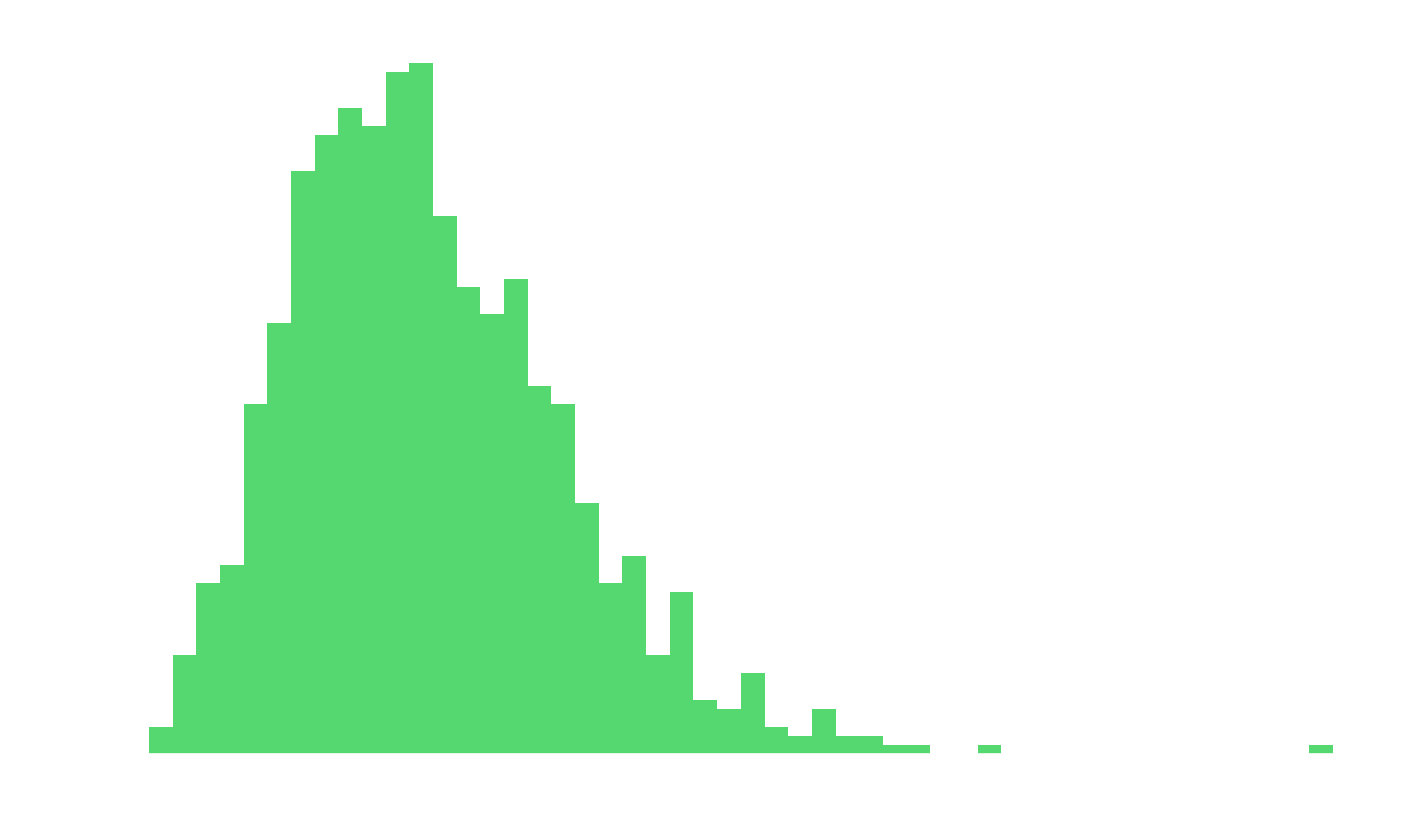

In [7]:
means = [get_data(10).mean() for i in range(1000)]
plt.hist(means)
np.std(means)

0.08516053560377225

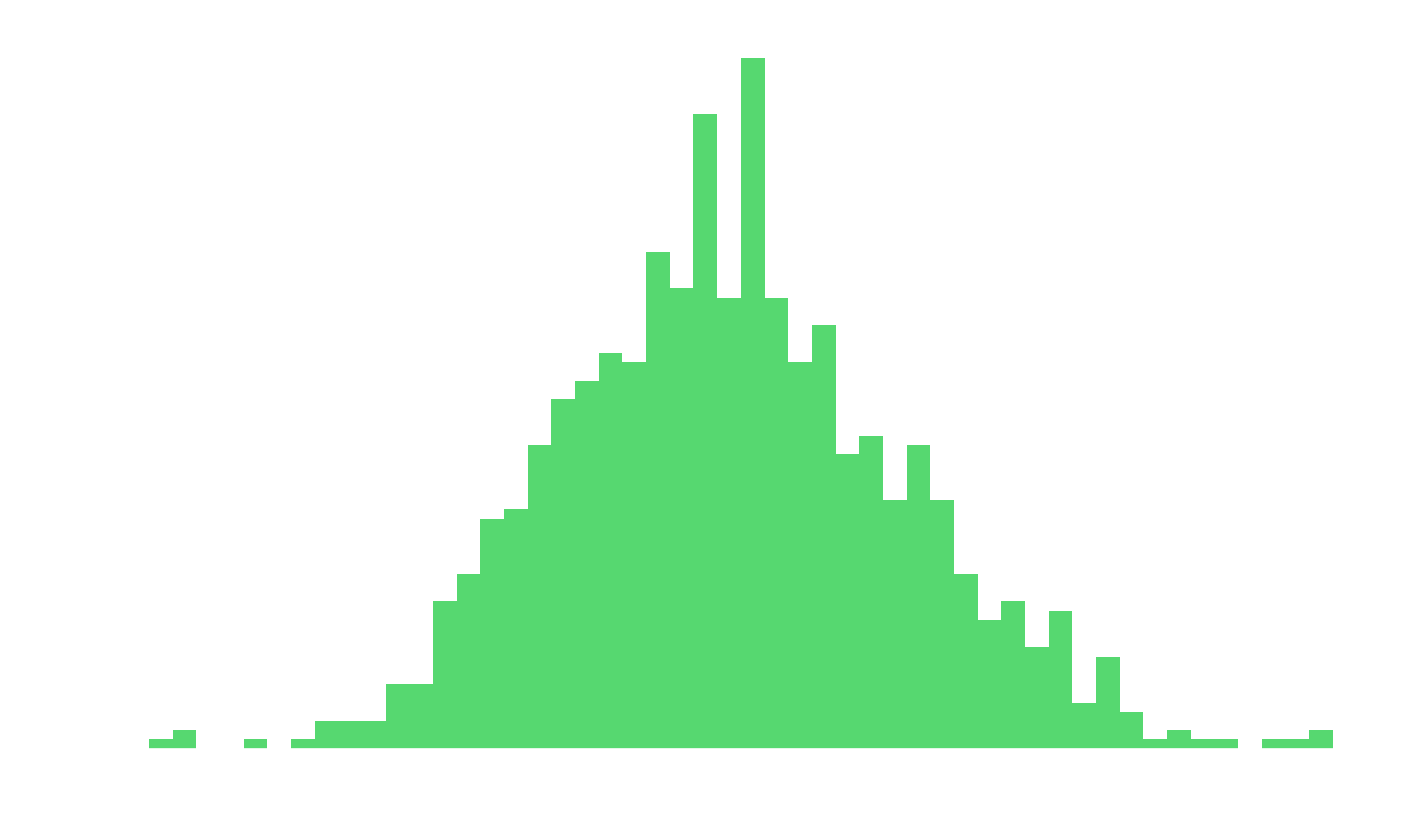

In [8]:
means = [get_data(100).mean() for i in range(1000)]
plt.hist(means)
np.std(means)

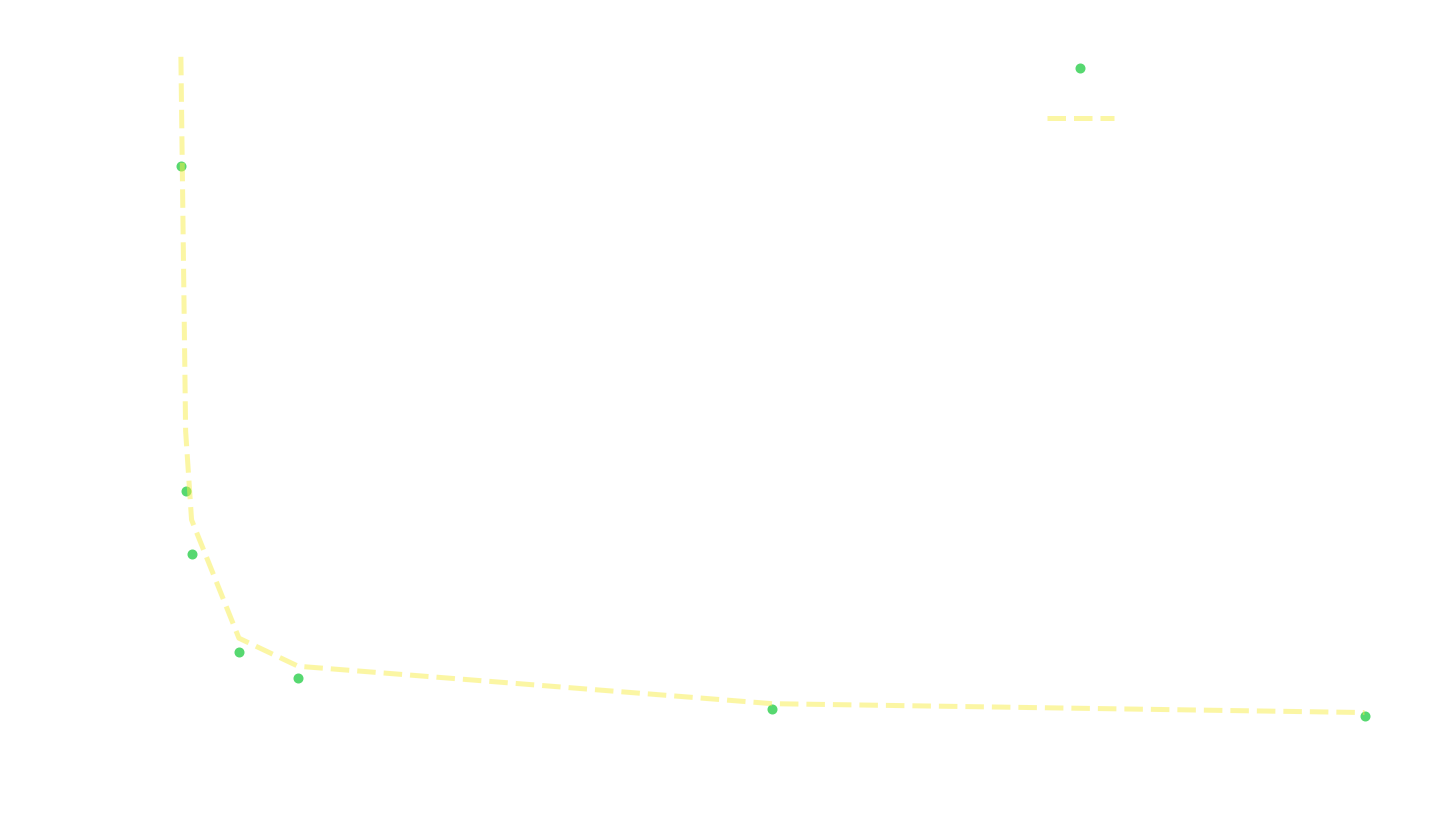

In [11]:
# get 1000 mean of each num_samps and save the std of each in stds array
num_samps = [10,50,100,500,1000,5000,10000]
stds = []
for n in num_samps:
    stds.append(np.std([get_data(n).mean() for i in range(1000)]))
plt.plot(num_samps, stds, 'o', label='Obs scatter')
plt.plot(num_samps, 1 / np.sqrt(num_samps), label='Rando function', alpha=0.5)
plt.legend();

(array([  4.,   8.,  10.,  16.,  24.,  37.,  45.,  79.,  93., 164., 209.,
        264., 329., 376., 412., 486., 544., 554., 601., 600., 639., 621.,
        573., 511., 487., 424., 368., 304., 251., 216., 186., 157., 116.,
         92.,  53.,  46.,  29.,  18.,  16.,  10.,   8.,   7.,   5.,   3.,
          2.,   0.,   2.,   0.,   0.,   1.]),
 array([2.13204417, 2.14471767, 2.15739116, 2.17006466, 2.18273816,
        2.19541165, 2.20808515, 2.22075865, 2.23343215, 2.24610564,
        2.25877914, 2.27145264, 2.28412613, 2.29679963, 2.30947313,
        2.32214662, 2.33482012, 2.34749362, 2.36016712, 2.37284061,
        2.38551411, 2.39818761, 2.4108611 , 2.4235346 , 2.4362081 ,
        2.4488816 , 2.46155509, 2.47422859, 2.48690209, 2.49957558,
        2.51224908, 2.52492258, 2.53759607, 2.55026957, 2.56294307,
        2.57561657, 2.58829006, 2.60096356, 2.61363706, 2.62631055,
        2.63898405, 2.65165755, 2.66433104, 2.67700454, 2.68967804,
        2.70235154, 2.71502503, 2.72769853, 2.

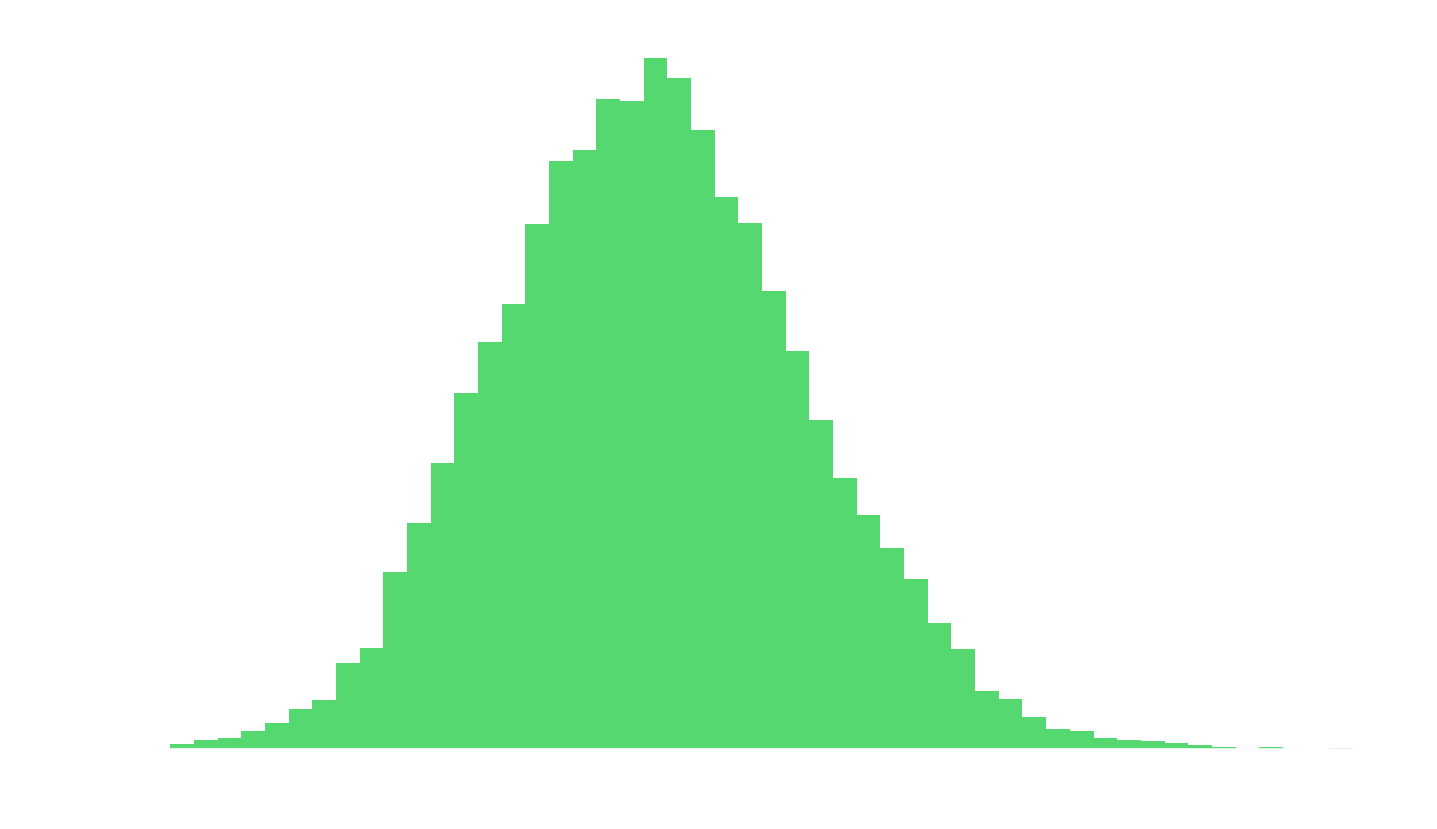

In [13]:
plt.hist([get_data(100).mean() for i in range(10000)])

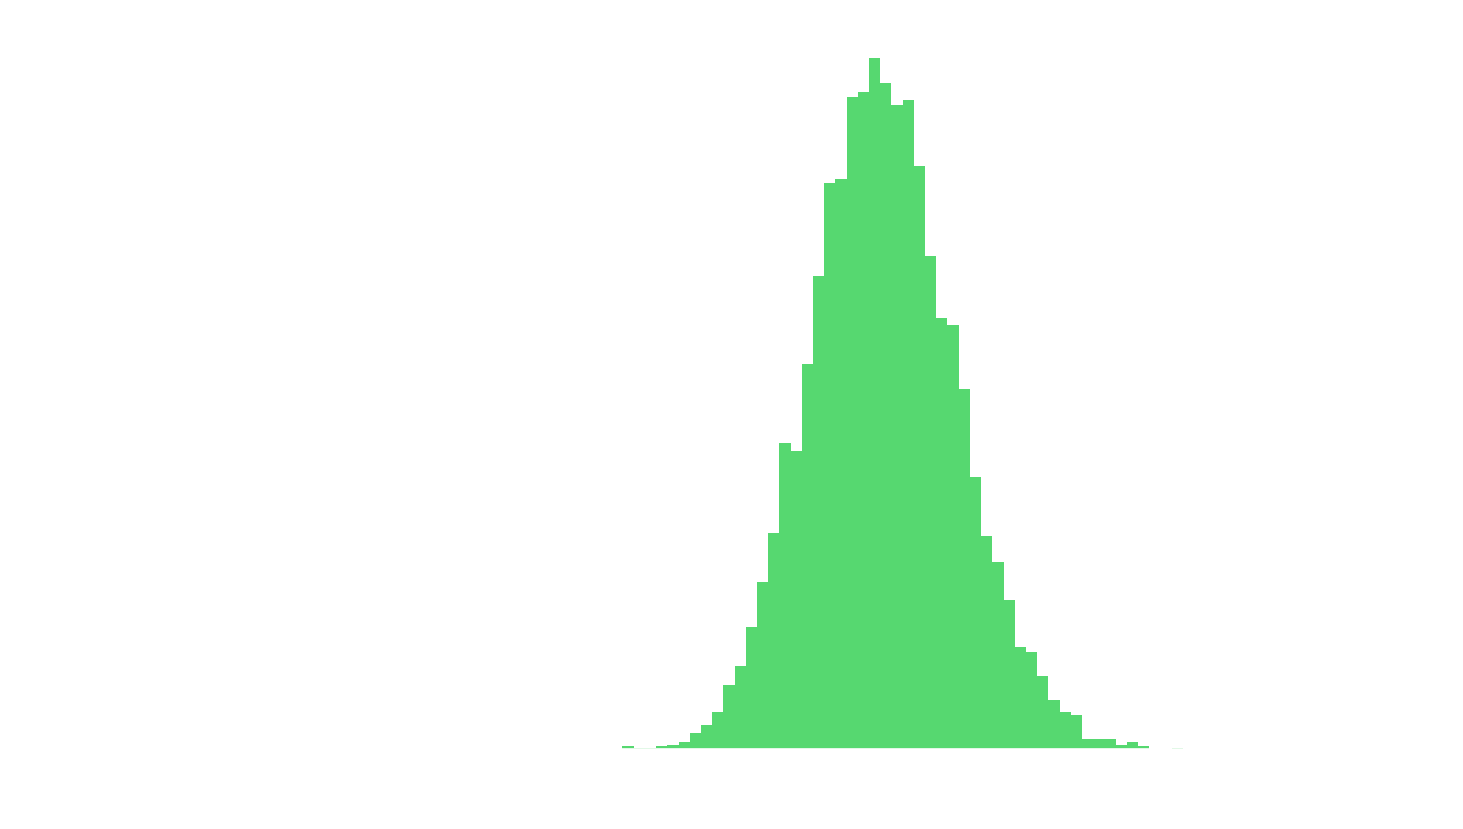

In [14]:
plt.hist([get_data(100).mean() for i in range(10000)])
plt.xlim(1.5,3);
# The mean of samples collected will approach the normal distribution, and the width of that distribution 
# will become thin and thin the more elements in the main sample we have

# Recap

1. Distribution of sample means approaches a normal
2. The width is determined by the number of points use to compute each sample mean

*****

If you have $N$ samples, the mean of your samples is distributed as per a normal around the true mean, with standard deviation $\sigma/\sqrt{N}$.

Or *another* way of saying this, is that if you go from $N_1$ data points to $N_2$ data points, you can determine the mean $\sqrt{N_2/N_1}$ more accurately. 4 times as many samples doesn't give 4 times more accuracy, only double the accuracy.

In [15]:
n = 1000
data = get_data(n)
sample_mean = np.mean(data)
uncert_mean = np.std(data) / np.sqrt(n)
print(f'We have determined the mean of population to be {sample_mean:.2f} +- {uncert_mean:.2f}')

We have determined the mean of population to be 2.38 +- 0.05


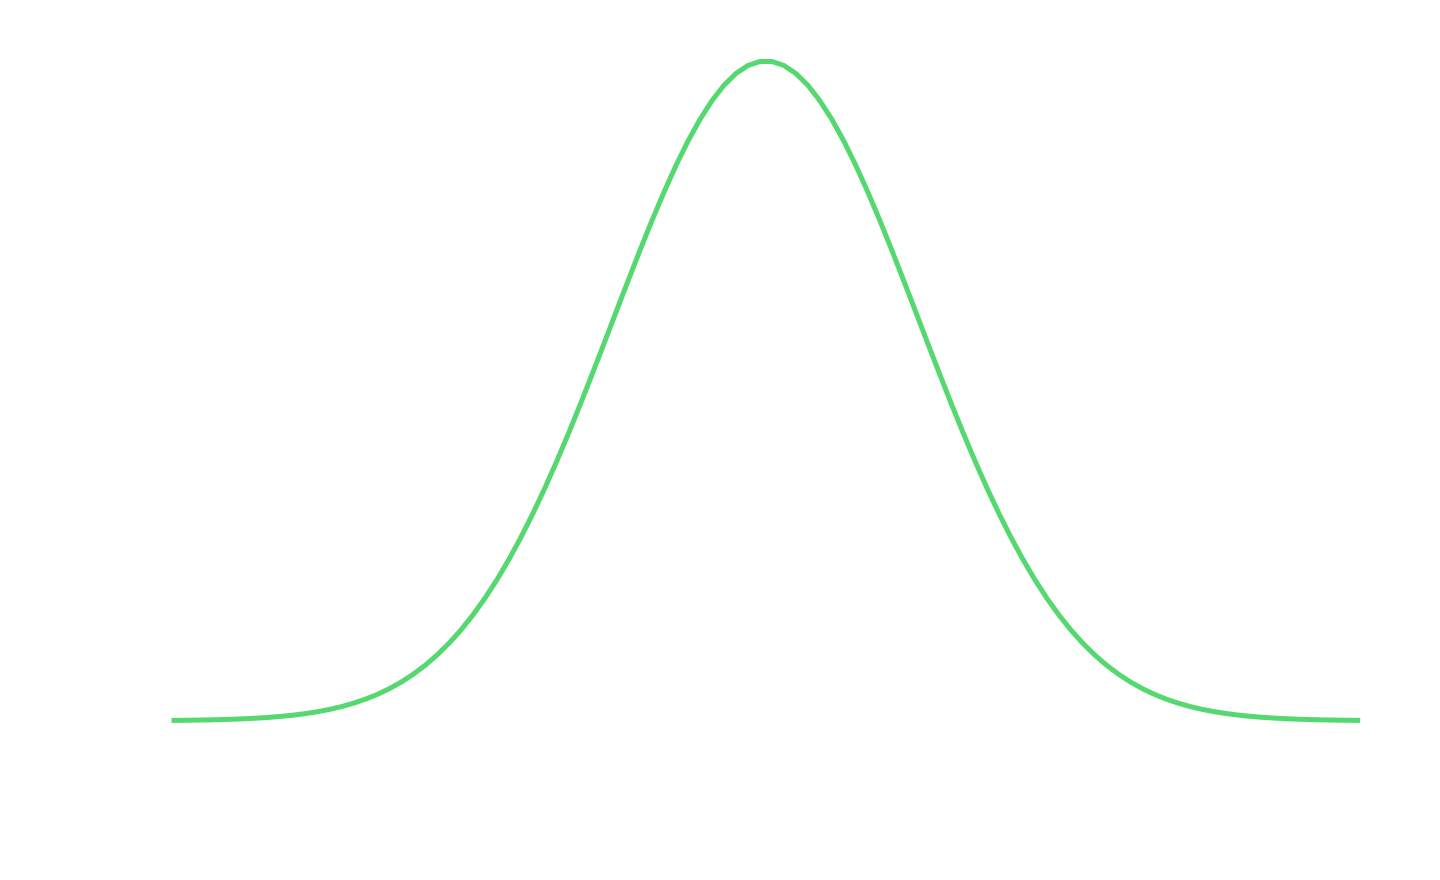

In [16]:
from scipy.stats import norm
xs = np.linspace(sample_mean - 0.2, sample_mean + 0.2, 100)
ys = norm.pdf(xs, sample_mean, uncert_mean)
plt.plot(xs,ys)
plt.xlabel('Pop mean')
plt.ylabel('Probability');